# 신장 트리
- 하나의 그래프가 있을 때 <b>모든 노드</b>를 포함하면서 <b>사이클이 존재하지 않는 부분 그래프</b>
- 트리의 성립 조건(모든 노드가 포함되어 서로 연결되면서 사이클이 존재하지 않는다는 조건)과 같아 **신장 트리**라고 부름

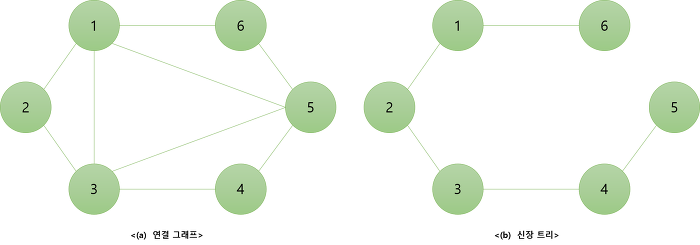

# 최소 신장 트리

- 신장 트리 중에서 <b>최소 비용</b>으로 만들 수 있는 신장 트리를 찾는 알고리즘   
ex. N개의 도시가 존재하는 상황에서 두 도시 사이에 도로를 놓아 전체 도시가 서로 연결될 수 있게 도로를 설치하는 경우

## 크루스칼 알고리즘

- 대표적인 최소 신장 트리 알고리즘  
- 그리디 알고리즘으로 분류(매 순간 최소 비용을 선택해서, 결과적으로 최소 비용이 됨)
- union-find 개념 사용
- 최소 신장 트리는 일종의 트리 자료구조이므로, 최종적으로 신장 트리에 포함되는 간선의 개수가 '노드의 개수 - 1'과 같다는 특징이 있다.

1. 간선의 크기를 오름차순으로 정렬하고 제일 낮은 비용의 간선을 선택한다.
2. 현재 선택한 간선이 정점 u, v를 연결하는 간선이라고 할 때 만약 u와 v가 같은 그룹이라면 아무것도 하지 않고 넘어간다. u와 v가 다른 그룹이라면 같은 그룹으로 만들고 현재 선택한 간선을 최소 신장트리에 추가한다.
3. 최소 신장 트리에 v-1개의 간선을 추가시켰다면 과정을 종료, 그렇지 않다면 그 다음으로 비용이 작은 간선을 선택한 후 2번의 과정을 반복한다.

**크루스칼 알고리즘 소스코드**

In [4]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b
        
# 노드의 개수와 간선(union 연산)의 개수 입력받기
v, e = map(int, input().split())
parent = [0] * (v+1) # 부모 테이블 초기화

# 모든 간선을 담을 리스트와 최종 비용을 담을 변수
edges = []
result = 0

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i
    
# 모든 간선에 대한 정보를 입력 받기
for _ in range(e):
    a, b, cost = map(int, input().split())
    # 비용순으로 정렬하기 위해서 튜플의 첫 번째 원소를 비용으로 설정
    edges.append((cost, a, b))
    
# 간선을 비용순으로 정렬
edges.sort()

# 간선을 하나씩 확인하며(v-1개)
for edge in edges:
    cost, a, b = edge
    # 사이클이 발생하지 않는 경우에만 집합에 포함(루트 노드가 같다면 사이클이 발생한 것)
    if find_parent(parent, a) != find_parent(parent, b):
        union_parent(parent, a, b)
        result += cost
        
print(result)

7 9
1 2 29
1 5 75
2 3 35
2 6 34
3 4 7
4 6 23
4 7 13
5 6 53
6 7 25
159


**크루스칼 알고리즘 시간복잡도: $ O(ElogE) $**

---

## 프림 알고리즘

- 크루스칼 알고리즘과 달리 **우선순위 큐**를 통해 구현할 수 있다.
- 크루스칼 알고리즘이 매 순간 가장 비용이 낮은 간선부터 시작해서 서로 떨어져 있던 정점들을 합쳐나가며 총 v-1개의 간선을 택하는 알고리즘이였다면, 프림 알고리즘은 <u>한 정점에서 시작해 확장해 나가는 알고리즘</u>이다.
- 프림 알고리즘 또한 매 순간마다 가장 비용이 낮은 간선을 택하는 **그리디 알고리즘**이다.    
      
   
1. 임의의 정점을 선택해 최소 신장 트리에 추가, 해당 정점과 연결된 모든 간선을 우선순위 큐에 추가한다.
2. 우선순위 큐에서 비용이 가장 작은 간선을 선택한다.
3. 만약 해당 간선이 최소 신장 트리에 포함된 두 정점을 연결한다면 아무것도 하지 않고 넘어간다. 해당 간선이 최소 신장 트리에 포함된 정점 u와 포함되지 않은 정점 v를 연결한다면 해당 간선과 정점 v를 최소 신장 트리에 추가 후 정점 v와 최소 신장 트리에 포함되지 않는 정점을 연결하는 모든 간선을 우선순위 큐에 추가한다.
4. 최소 신장 트리에 v-1개의 간선이 추가될 때까지 2, 3번 과정을 반복한다.

**프림 알고리즘 소스코드**

In [5]:
import heapq
from collections import defaultdict


# 노드, 간선의 수 입력받기
n, m = map(int, input().split())
graph = defaultdict(list) # 빈 그래프 초기화
visit = [False] * (n+1) # visit[i]: i번재 정점이 최소 신장 트리에 포함되었는지 여부를 확인

# 무방향 그래프
for _ in range(m): # 간선 정보 입력받기
    a, b, cost = map(int, input().split())
    graph[a].append([cost, a, b])
    graph[b].append([cost, b, a])

# print(graph)

# 프림 알고리즘
def prim(graph, start):
    visit[start] = True
    edges = graph[start] # start 정점과 연결된 모든 간선들
    heapq.heapify(edges) # 우선순위 큐 생성(최소 비용)
    mst = []
    total_weight = 0 # 전체 가중치
    cnt = 0
    while cnt < n-1:
        weight, u, v = heapq.heappop(edges) # 가중치, 두 정점
        if not visit[v]: # v 정점이 아직 최소 신장트리에 추가되지 않았다면
            visit[v] = True
            cnt += 1
            mst.append((u, v)) # 최소신장트리에 간선 추가
            total_weight += weight # 전체 가중치 갱신

            for edge in graph[v]: # 다음 인접 간선 탐색
                if not visit[edge[2]]: # 정점 v와 연결된 정점 중 최소 신장트리에 포함되지 않은 정점
                    heapq.heappush(edges, edge) # 을 가진 간선을 우선순위 큐에 edge 삽입

#     print(mst)
    return total_weight


print(prim(graph, 1))

5 7
1 2 4
1 3 3
1 4 3
3 4 3
3 5 5
4 5 6
2 5 8
15


**프림 알고리즘 시간복잡도: $ O(ElogE)$**
- 각 간선은 우선순위 큐에 최대 1번씩 들어가고, 또 최대 1번씩 삭제되는데 우선순위 큐에서 삽입, 삭제의 시간복잡도는 $log(E)$이기 때문이다.